---
# DSCD 611: Programming for Data Scientists I - Final Project

---
# Physicochemical Predictors of White Wine Quality: Evidence from Statistical and Machine Learning Models

---

---

# GROUP: B
# Desmond Lemuel Torsi - 22424834
# Eugene Boye Afari - 22424749
# Emmanuel Asante Opoku - 22426020 (Head)
# Samuel Ofori - 22424281
# Henry Asiedu Adade - 22428542

---

### Data Source: 
- Repository: UCI Machine Learning Repository
- Dataset title: Wine Quality Data Set
- Contributors/Authors: Paulo Cortez, António Cerdeira, Fernando Almeida, Telmo Matos, and José Reis
- Institution: University of Minho, Portugal
- Year: 2009

---
### Introductory Paper:
- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, Elsevier, 47(4):547-553, 2009.
---

### Variables and Definition 

- Fixed Acidity - Represents the concentration of non-volatile acids in wine. 
- Volatile Acidity - Measures the amount of acetic acid in wine. At high levels, it can cause an unpleasant vinegar-like taste and is usually considered a quality defect
- Citric Acid - A weak organic acid that can add freshness and flavor. In moderate amounts, it enhances taste, but excessive levels may negatively affect balance.
- Residual Sugar - The amount of sugar remaining after fermentation. It strongly influences sweetness and mouthfeel and differentiates dry from semi-sweet or sweet wines.

- Chlorides - Represents the salt content in wine. High chloride levels can make wine taste salty or flat and are generally associated with lower quality.

- Free Sulfur Dioxide - The portion of sulfur dioxide that is available to prevent microbial growth and oxidation. Adequate levels help preserve freshness and stability.
- Total Sulfur Dioxide - Includes both free and bound sulfur dioxide. Excessive amounts can impair aroma and taste, while insufficient levels reduce shelf life.
- Density - Reflects the mass per unit volume of the wine. Density is influenced by alcohol and sugar content and indirectly indicates fermentation completeness.
- pH - Measures acidity or alkalinity. Lower pH values indicate higher acidity, which improves microbial stability and influences taste sharpness.
- Sulphates - Contribute to wine preservation and can enhance aroma and flavor intensity when present in moderate quantities.
- Alcohol - Represents the ethanol content by volume. Alcohol influences body, warmth, and flavor intensity and is often positively associated with quality.
- Quality - An ordinal target variable (scored from 0–10) representing expert sensory evaluations of overall wine quality. Ordinal, but modeled as continuous in regression



---






### Importing relevant libraries from python

In [91]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

###  Loading and information of data 

In [92]:
#import the dataset and show part of the dataframe

df= pd.read_csv('whitewine.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6
1,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6
2,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6
3,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [94]:
df.shape

(4898, 12)

In [95]:

df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Checking for Duplicates

In [96]:
df.duplicated().any()


np.True_

In [97]:
df.duplicated().sum()

np.int64(937)

In [98]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6
5,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6
7,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6
8,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6
20,6.2000,0.6600,0.4800,1.2000,0.0290,29.0000,75.0000,0.9892,3.3300,0.3900,12.8000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4000,0.2300,0.3500,10.3000,0.0420,54.0000,140.0000,0.9967,3.2300,0.4700,9.2000,5
4850,7.0000,0.3600,0.3500,2.5000,0.0480,67.0000,161.0000,0.9915,3.0500,0.5600,11.1000,6
4851,6.4000,0.3300,0.4400,8.9000,0.0550,52.0000,164.0000,0.9949,3.1000,0.4800,9.6000,5
4856,7.1000,0.2300,0.3900,13.7000,0.0580,26.0000,172.0000,0.9976,2.9000,0.4600,9.0000,6


In [99]:
df = df.drop_duplicates()

In [100]:
df.duplicated().sum()

np.int64(0)

In [101]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.0000,3961.0000,3961.0000,3961.0000,3961.0000,3961.0000,3961.0000,3961.0000,3961.0000,3961.0000,3961.0000,3961.0000
mean,6.8393,0.2805,0.3343,5.9148,0.0459,34.8892,137.1935,0.9938,3.1955,0.4904,10.5894,5.8548
std,0.8669,0.1034,0.1224,4.8616,0.0231,17.2100,43.1291,0.0029,0.1515,0.1135,1.2171,0.8907
min,3.8000,0.0800,0.0000,0.6000,0.0090,2.0000,9.0000,0.9871,2.7200,0.2200,8.0000,3.0000
25%,6.3000,0.2100,0.2700,1.6000,0.0350,23.0000,106.0000,0.9916,3.0900,0.4100,9.5000,5.0000
50%,6.8000,0.2600,0.3200,4.7000,0.0420,33.0000,133.0000,0.9935,3.1800,0.4800,10.4000,6.0000
75%,7.3000,0.3300,0.3900,8.9000,0.0500,45.0000,166.0000,0.9957,3.2900,0.5500,11.4000,6.0000
max,14.2000,1.1000,1.6600,65.8000,0.3460,289.0000,440.0000,1.0390,3.8200,1.0800,14.2000,9.0000


### Checking the type and number of categories for each variable

In [102]:
feature_types = {
    "continuous": df.select_dtypes(include=['int64', 'float64']).columns.tolist(), 
    "categorical": df.select_dtypes(include=['object', 'category']).columns.tolist()
}

feature_types


{'continuous': ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'],
 'categorical': []}

In [103]:
df = df.rename(columns={
    "residual sugar": "residual_sugar",
    "free sulfur dioxide": "free_sulfur_dioxide",
    "total sulfur dioxide": "total_sulfur_dioxide",
    "fixed acidity":"fixed_acidity",
    "volatile acidity":"volatile_acidity",
    "citric acid":"citric_acid"
})


In [104]:
# Select only numeric (continuous) columns
continuous_variables = df.select_dtypes(include=['int64', 'float64'])



--- 
# Outlier Detection 
---

- Methods to be considered are Z-Score or IQR
- Z-score, is sensitive to the mean and variance, and hence appropriate when data is approximately normally distributed
- Interquarile Range (IQR), does not assume any distribution shape, and hence robust when data is not normally distributed  or skewed or bimodal or multimodal 

### Checking for variations in Distributions to determine which outlier method to use


### Graphical detection of normality

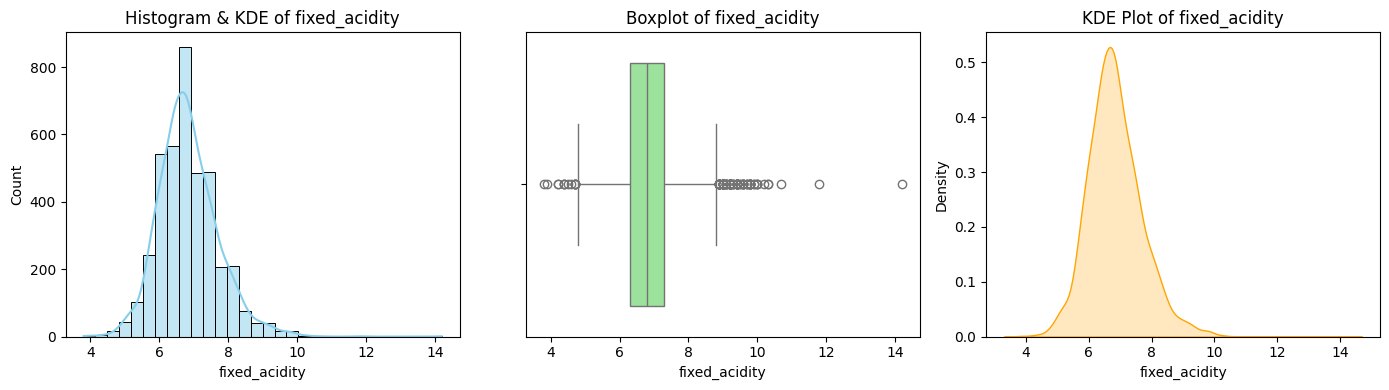

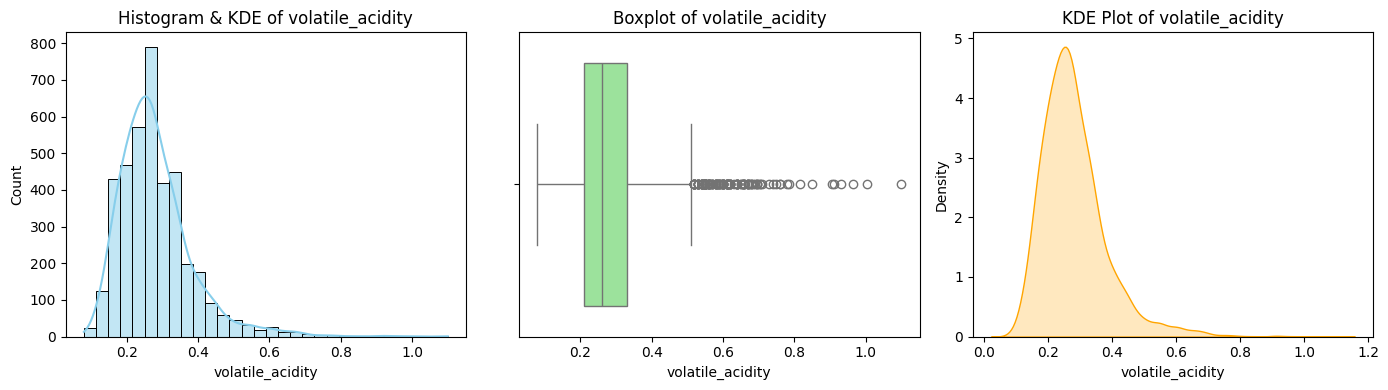

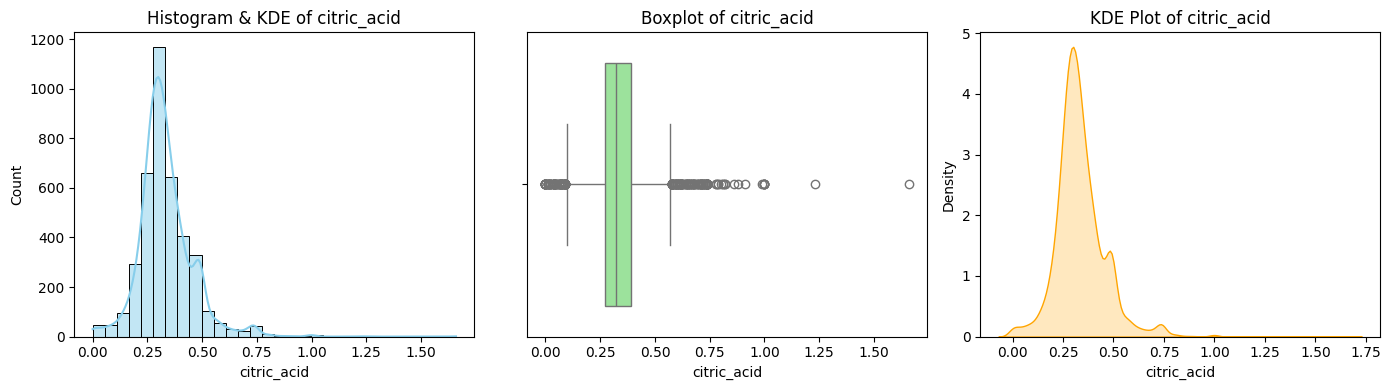

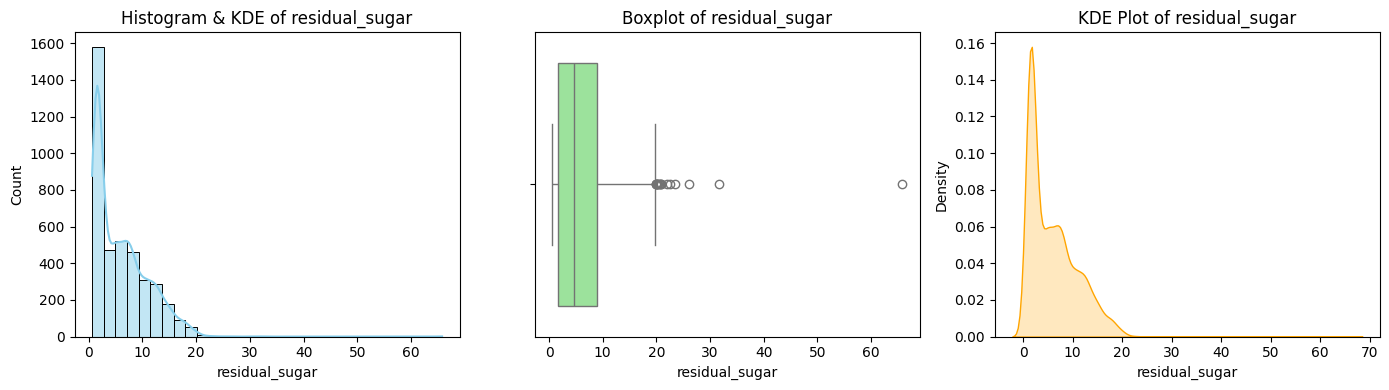

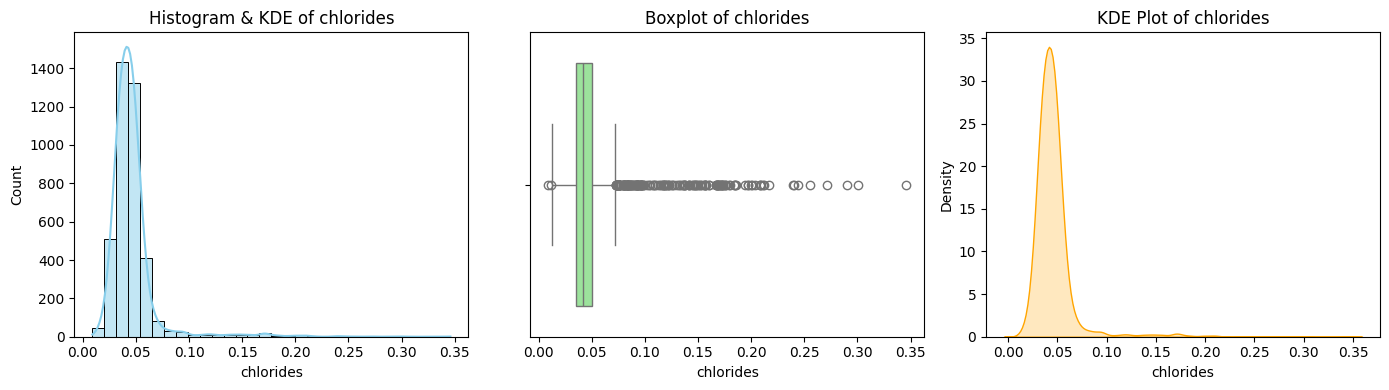

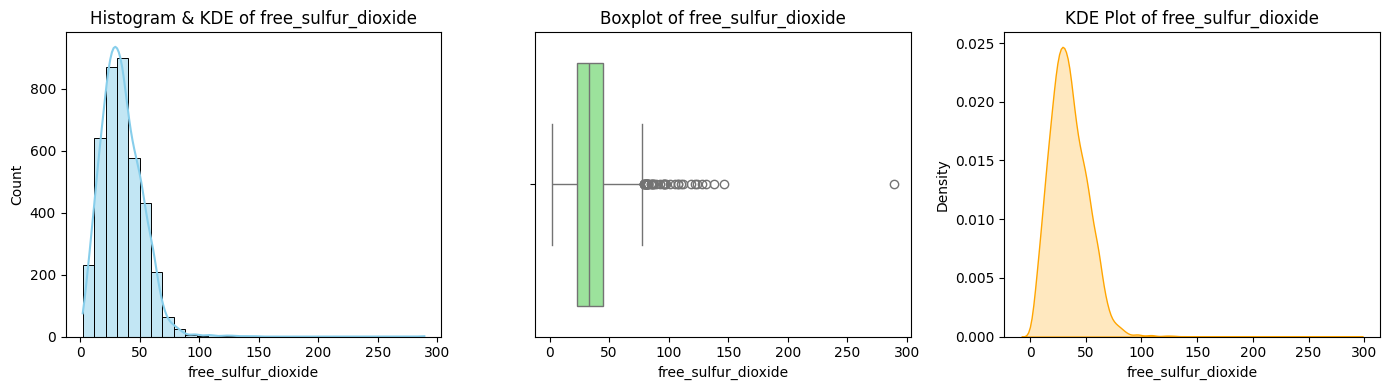

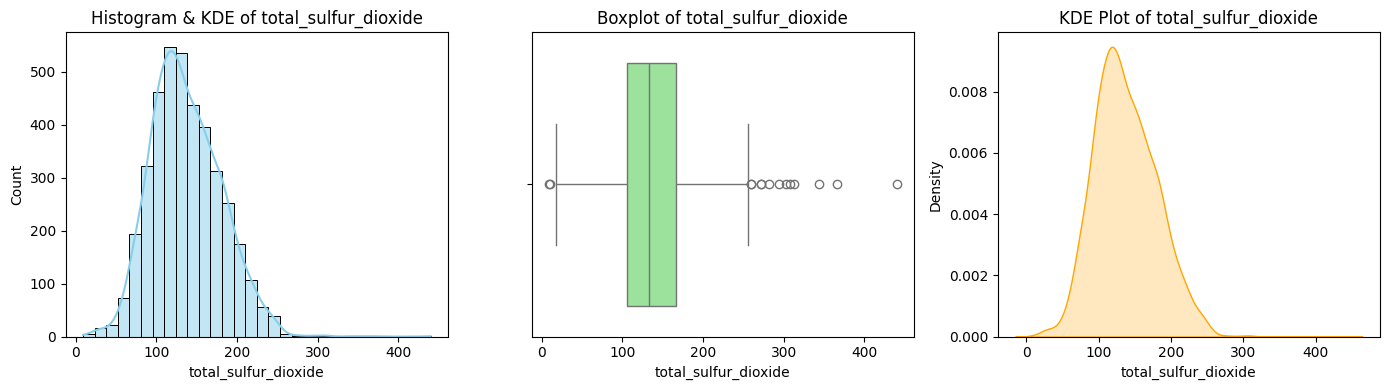

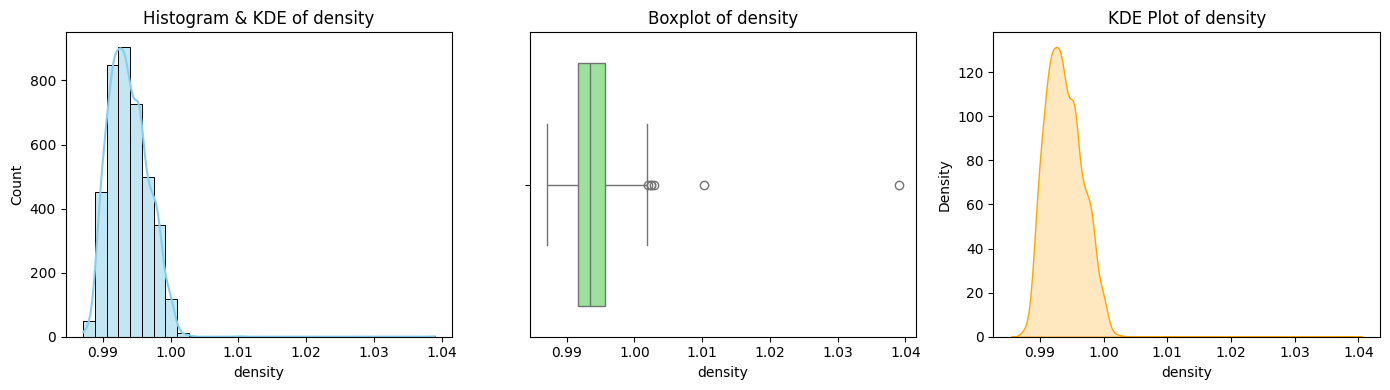

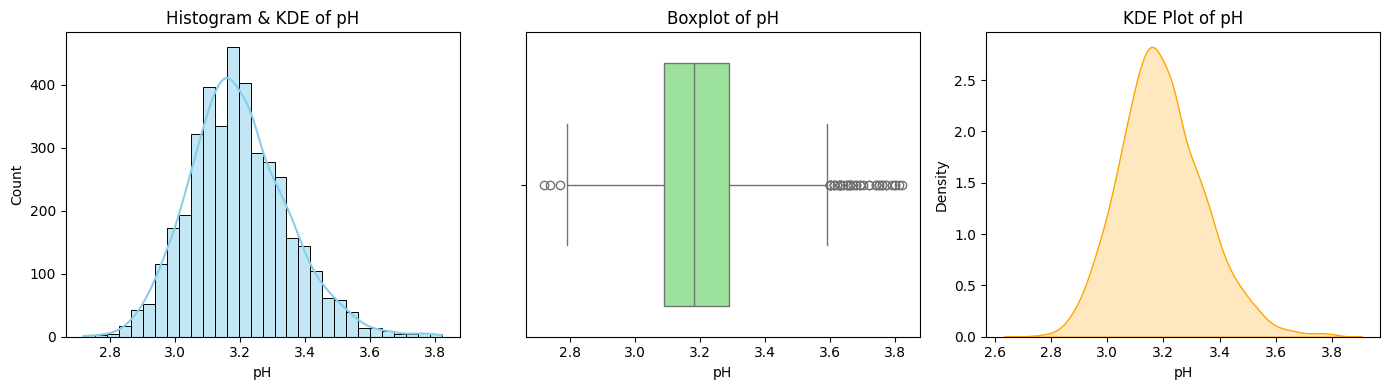

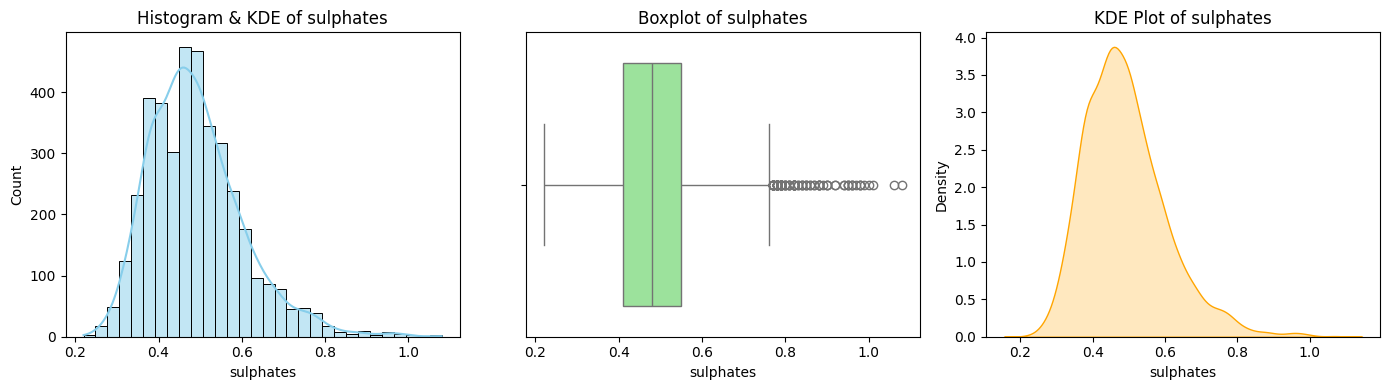

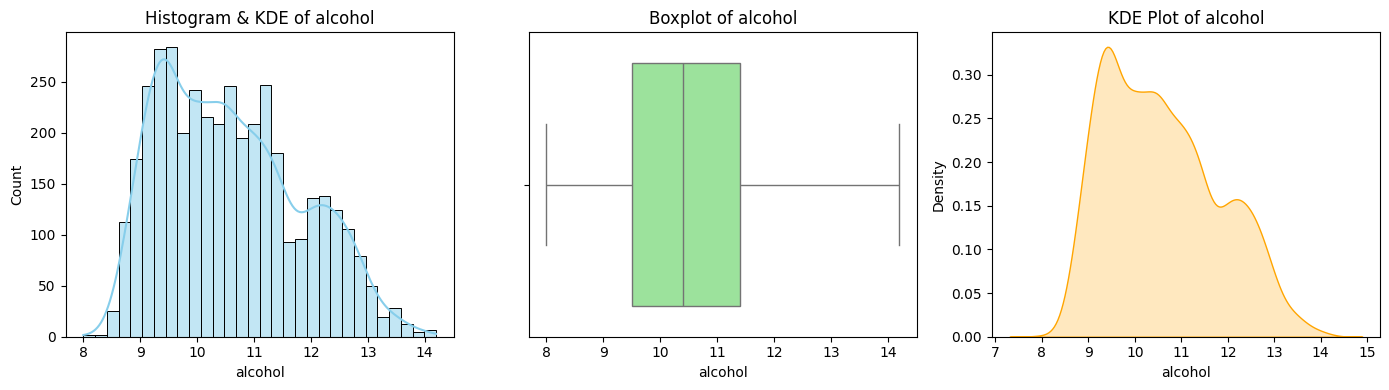

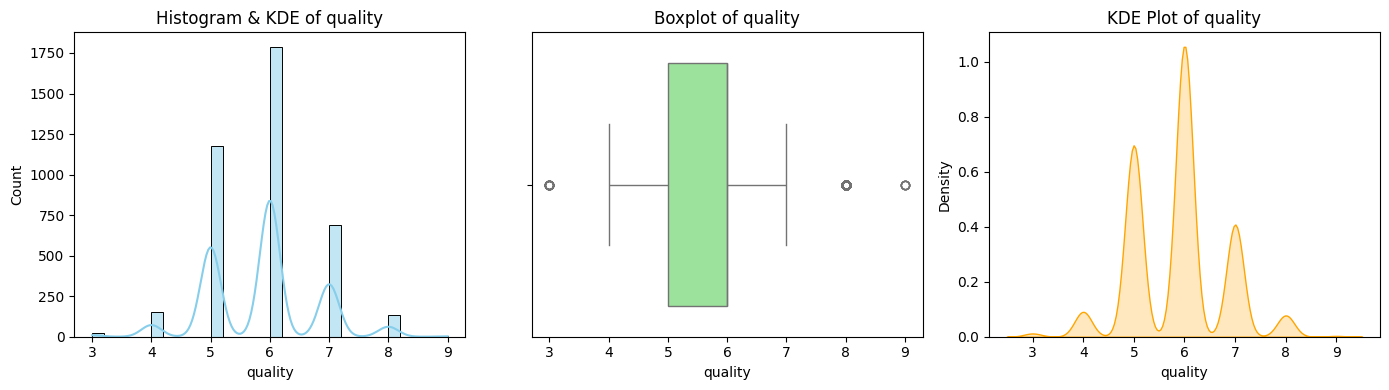

In [105]:
def plot_continuous_variables(df, features):
    for col in features:
        plt.figure(figsize=(14,4))

        # Histogram with KDE
        plt.subplot(1,3,1)
        sns.histplot(df[col], kde=True, bins=30, color="skyblue")
        plt.title(f"Histogram & KDE of {col}")

        # Boxplot
        plt.subplot(1,3,2)
        sns.boxplot(x=df[col], color="lightgreen")
        plt.title(f"Boxplot of {col}")

        # KDE plot alone
        plt.subplot(1,3,3)
        sns.kdeplot(df[col], fill=True, color="orange")
        plt.title(f"KDE Plot of {col}")

        plt.tight_layout()
        plt.show()

# Run for numerical columns
plot_continuous_variables(df, continuous_variables)


- Almost all the variables are not normally distributed
- A parametric analysis will be handy

### Parametric Detection of normality

### Shapiro Test for Normality

In [106]:
from scipy.stats import kstest

def test_normality_ks(df, features):
    results = {}
    for col in features:
        stat, p = kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
        results[col] = {"K-S statistic": stat, "p-value": p}
        if p > 0.05:
            print(f"{col}: Likely Normal (p = {p:.4f})")
        else:
            print(f"{col}: Not Normal (p = {p:.4f})")
    return results

# Run the test
ks_results = test_normality_ks(df, continuous_variables)


fixed_acidity: Not Normal (p = 0.0000)
volatile_acidity: Not Normal (p = 0.0000)
citric_acid: Not Normal (p = 0.0000)
residual_sugar: Not Normal (p = 0.0000)
chlorides: Not Normal (p = 0.0000)
free_sulfur_dioxide: Not Normal (p = 0.0000)
total_sulfur_dioxide: Not Normal (p = 0.0000)
density: Not Normal (p = 0.0000)
pH: Not Normal (p = 0.0000)
sulphates: Not Normal (p = 0.0000)
alcohol: Not Normal (p = 0.0000)
quality: Not Normal (p = 0.0000)


- Z-score cannot be used to detect the outliers, because all the affected variables are not normally distributed, IQR becomes handy then

### Detecting Outliers using Interquartile Range (IQR)

In [107]:
def detect_outliers_iqr(df, features):
    outlier_info = {}

    for col in features:
        Q1 = df[col].quantile(0.25)   # 25th percentile
        Q3 = df[col].quantile(0.75)   # 75th percentile
        IQR = Q3 - Q1                 # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_info[col] = {
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Num Outliers": len(outliers),
            "Outlier Indices": outliers.index.tolist()
        }

        print(f"{col}: {len(outliers)} outliers detected")

    return outlier_info


# IQR outlier detection
iqr_results = detect_outliers_iqr(df, continuous_variables)


fixed_acidity: 106 outliers detected
volatile_acidity: 133 outliers detected
citric_acid: 223 outliers detected
residual_sugar: 16 outliers detected
chlorides: 178 outliers detected
free_sulfur_dioxide: 44 outliers detected
total_sulfur_dioxide: 14 outliers detected
density: 6 outliers detected
pH: 46 outliers detected
sulphates: 96 outliers detected
alcohol: 0 outliers detected
quality: 156 outliers detected


In [108]:

affected_variables = [col for col, info in iqr_results.items() if info["Num Outliers"] > 0]

print("Affected variables:", affected_variables)


Affected variables: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'quality']


- All, but alcohol, are affected by outliers

# Treatment of Affected Variables

### Winsorization of affected variables

In [109]:
from scipy.stats.mstats import winsorize

# List of affected variables (numeric)
affected_variables = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'quality']

# Winsorize each affected variable (0% lower, 5% upper)
for col in affected_variables:
    w = winsorize(df[col].astype(float), limits=[0.02, 0.05])
    df[col] = w.data  # extract clean array instead of masked array

print("Winsorization complete for:", affected_variables)


Winsorization complete for: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'quality']


### Checking for outliers after rectification

In [110]:
def detect_outliers_iqr(df, features):
    outlier_info = {}

    for col in features:
        Q1 = df[col].quantile(0.25)   # 25th percentile
        Q3 = df[col].quantile(0.75)   # 75th percentile
        IQR = Q3 - Q1                 # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_info[col] = {
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Num Outliers": len(outliers),
            "Outlier Indices": outliers.index.tolist()
        }

        print(f"{col}: {len(outliers)} outliers detected")

    return outlier_info

iqr_results = detect_outliers_iqr(df, continuous_variables)

fixed_acidity: 0 outliers detected
volatile_acidity: 0 outliers detected
citric_acid: 0 outliers detected
residual_sugar: 0 outliers detected
chlorides: 0 outliers detected
free_sulfur_dioxide: 0 outliers detected
total_sulfur_dioxide: 0 outliers detected
density: 0 outliers detected
pH: 0 outliers detected
sulphates: 0 outliers detected
alcohol: 0 outliers detected
quality: 0 outliers detected


- No outlier detected

### Data Visualization After Correction

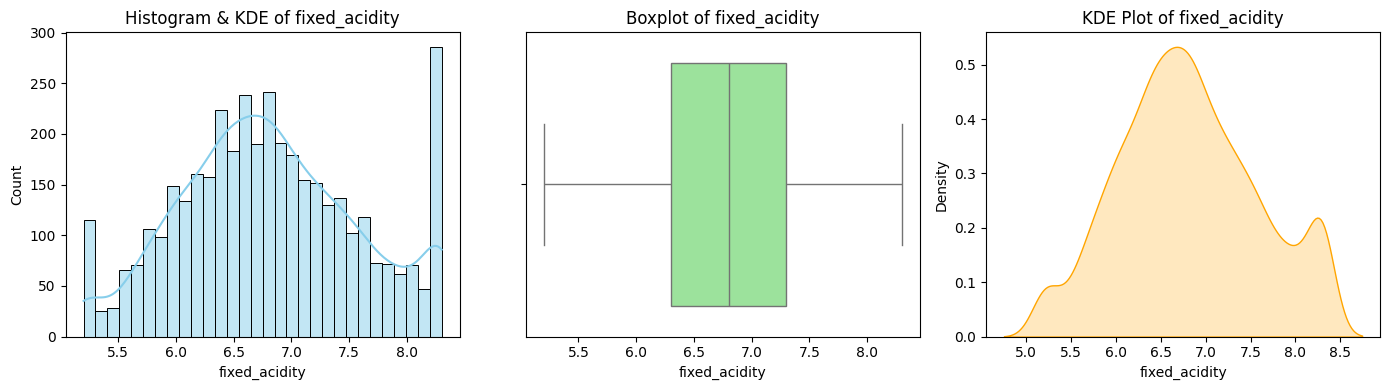

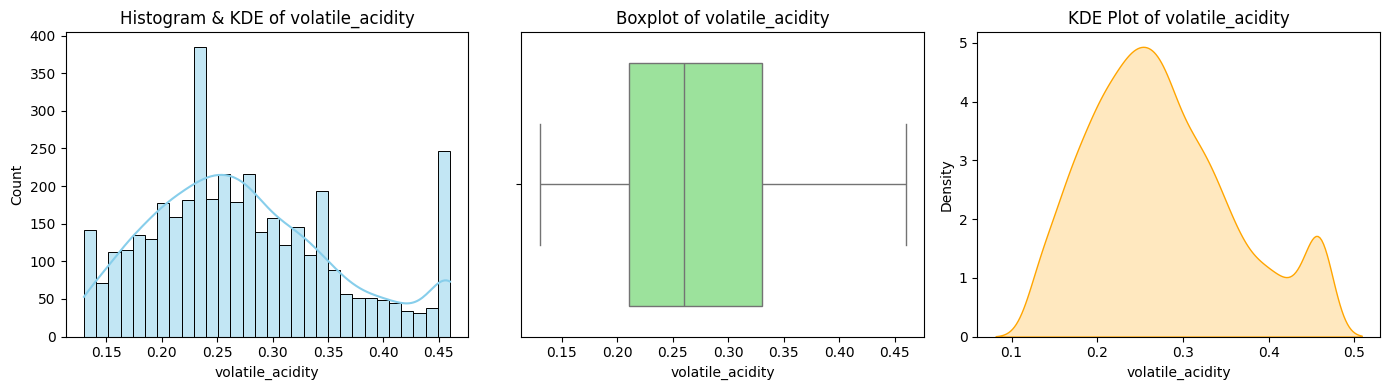

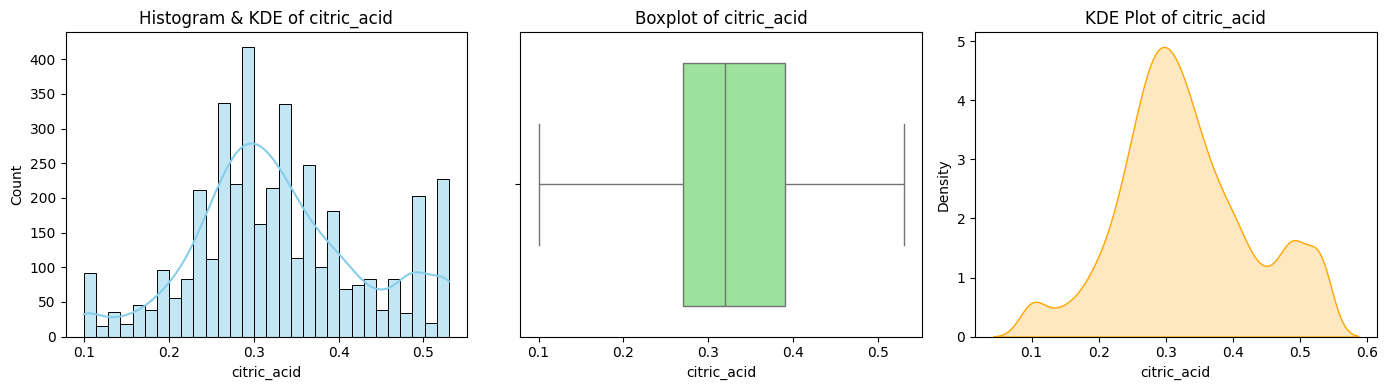

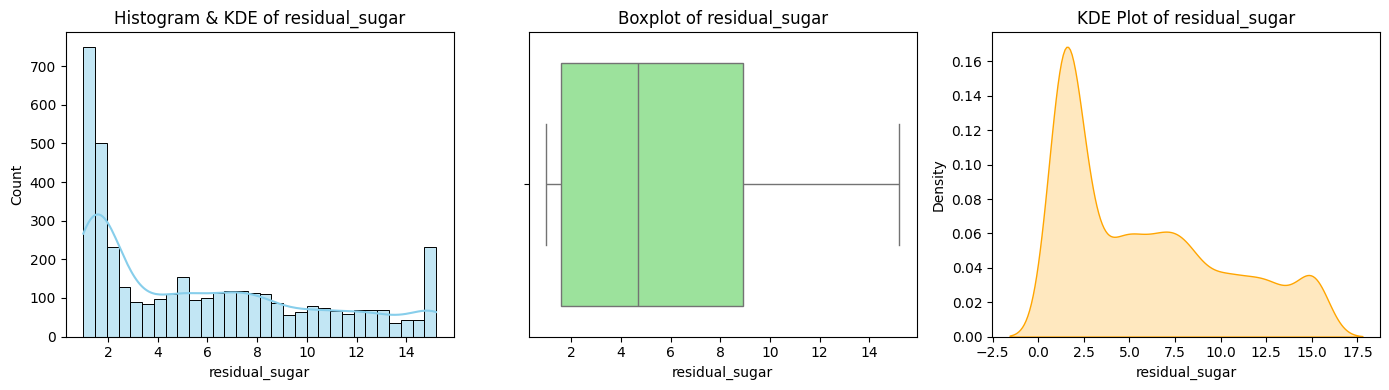

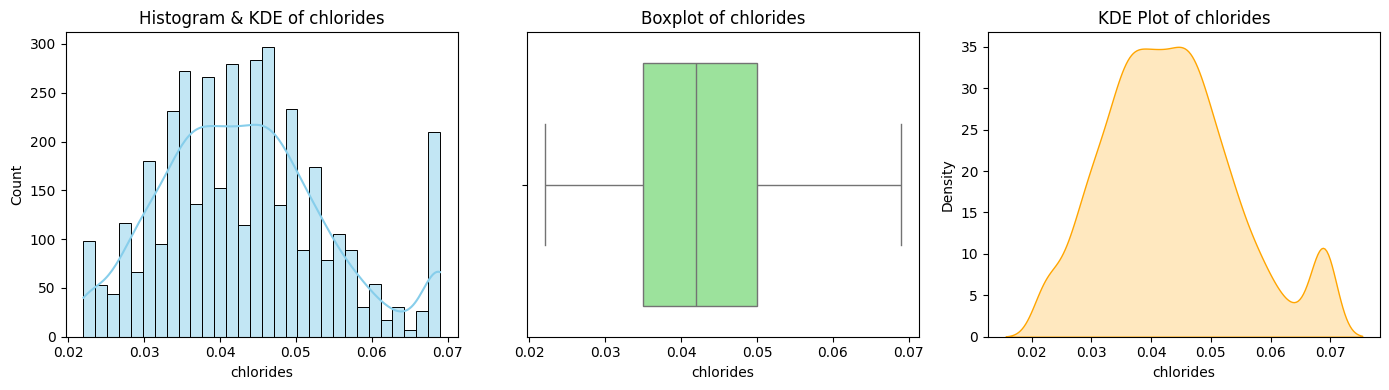

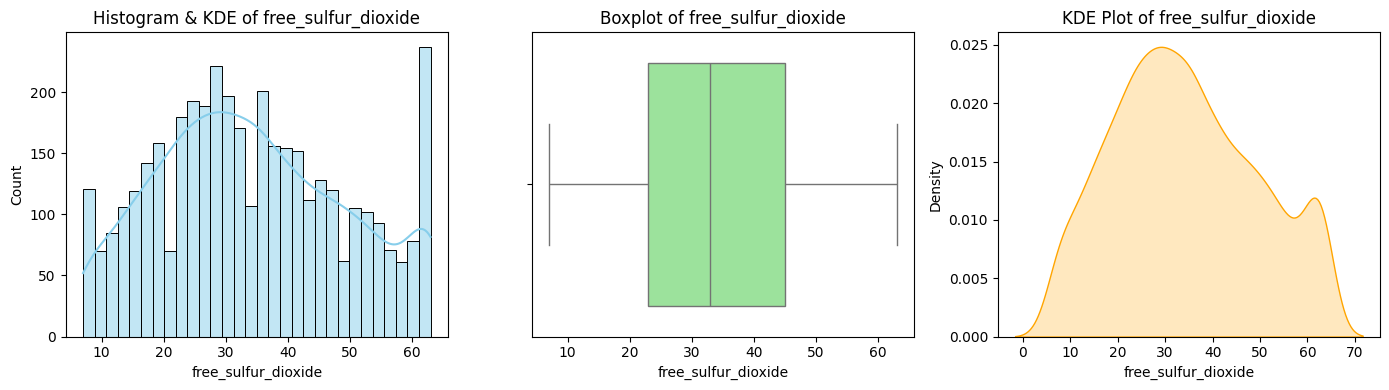

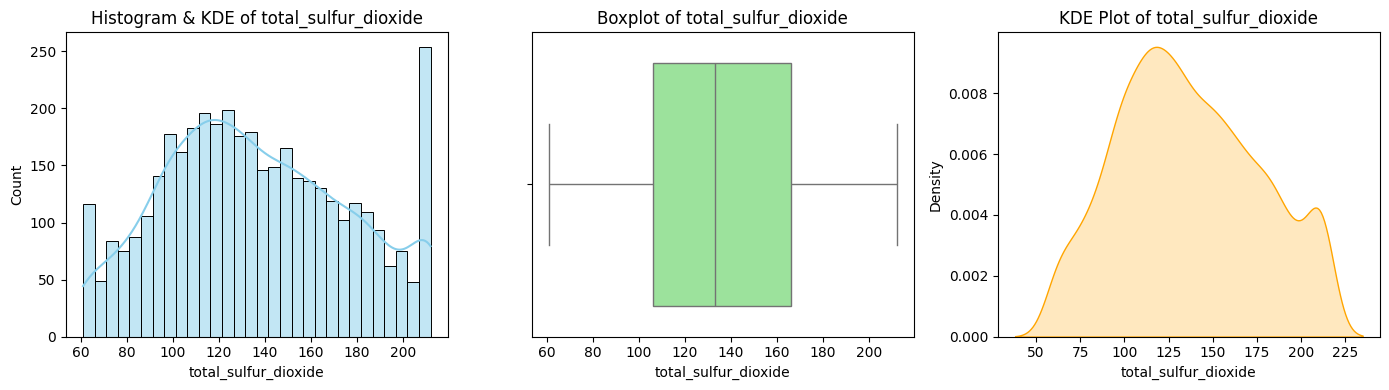

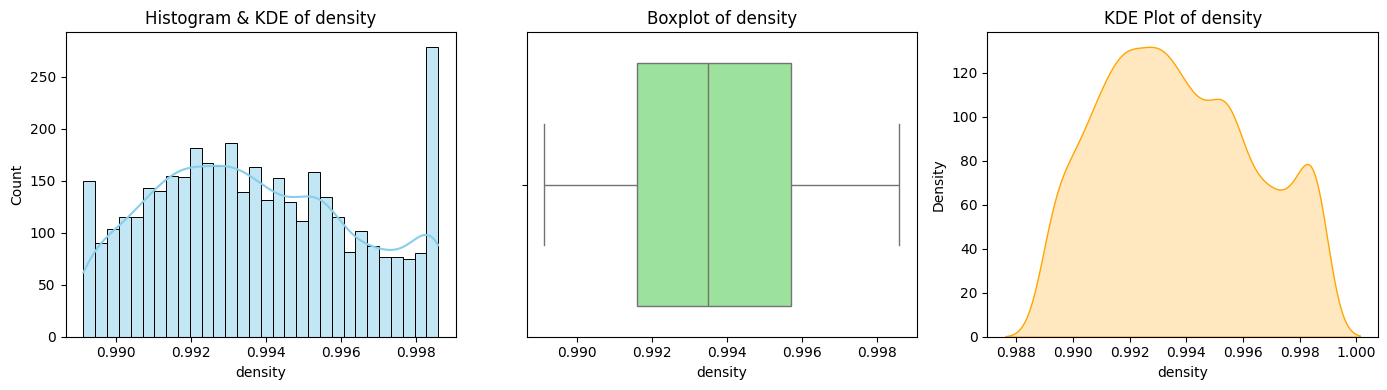

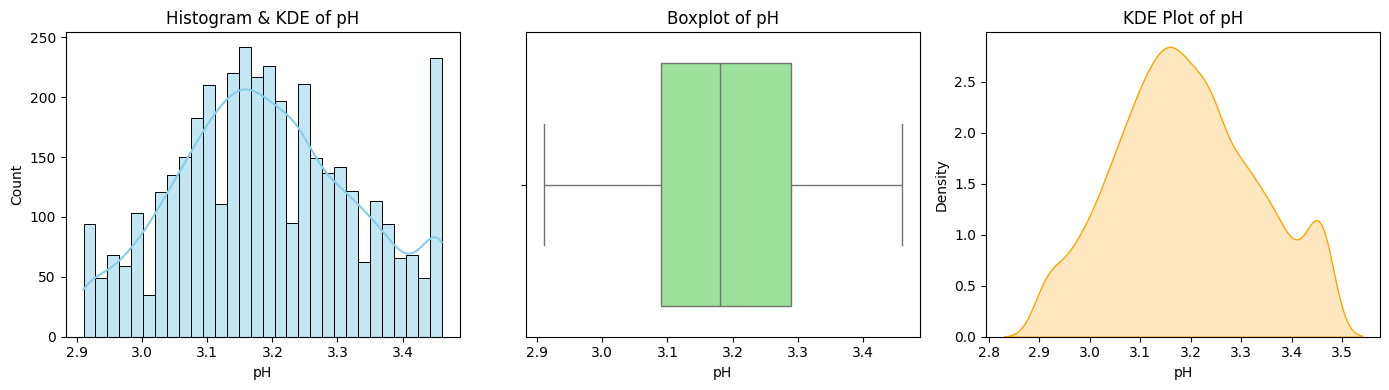

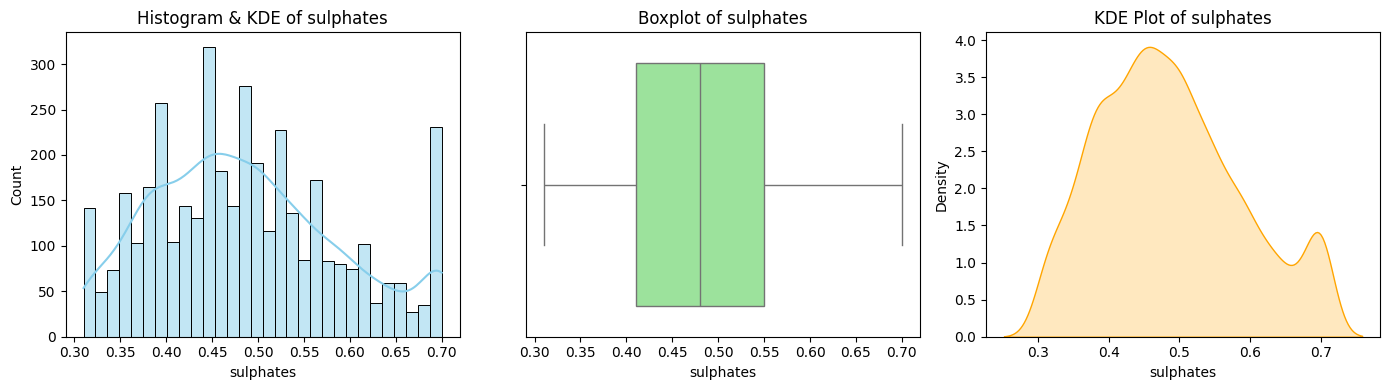

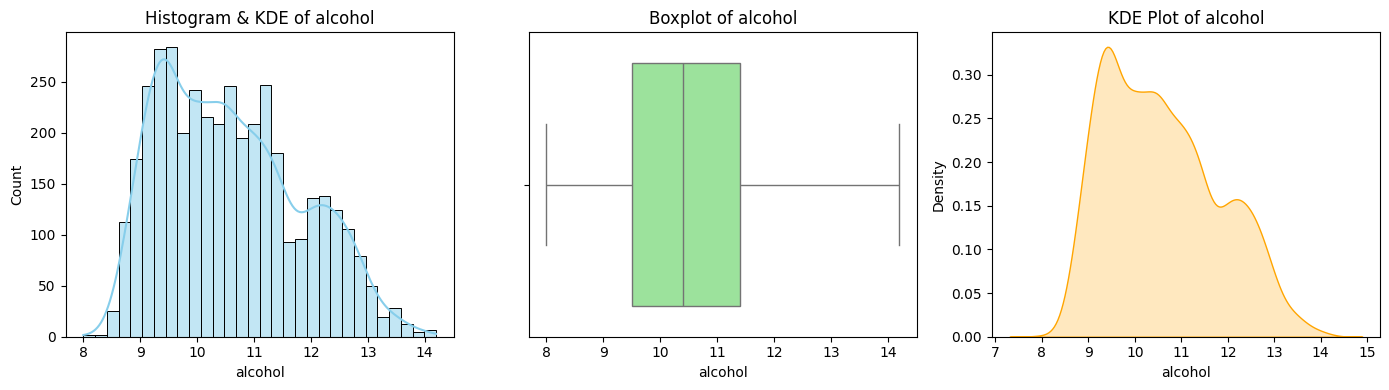

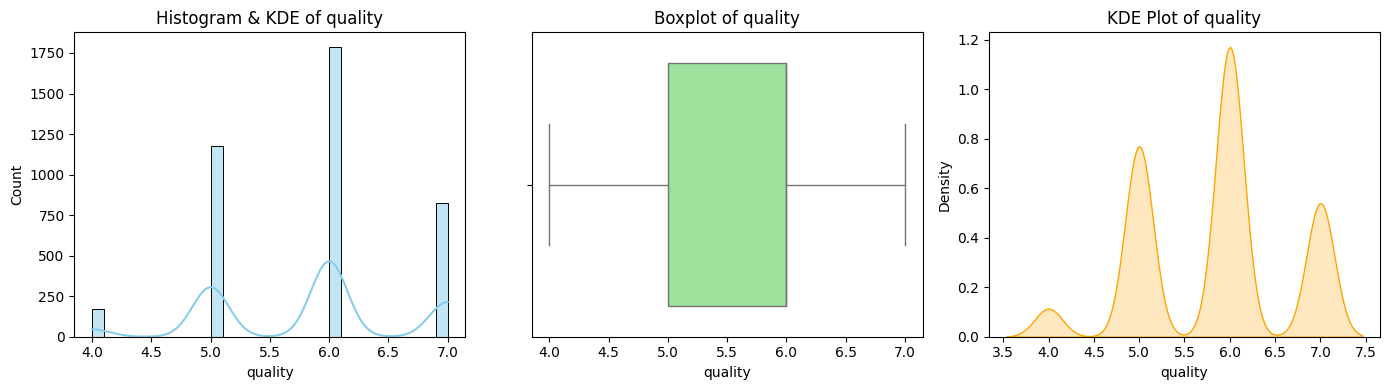

In [111]:
def plot_continuous_variables(df, features):
    for col in features:
        plt.figure(figsize=(14,4))

        # Histogram with KDE
        plt.subplot(1,3,1)
        sns.histplot(df[col], kde=True, bins=30, color="skyblue")
        plt.title(f"Histogram & KDE of {col}")

        # Boxplot
        plt.subplot(1,3,2)
        sns.boxplot(x=df[col], color="lightgreen")
        plt.title(f"Boxplot of {col}")

        # KDE plot alone
        plt.subplot(1,3,3)
        sns.kdeplot(df[col], fill=True, color="orange")
        plt.title(f"KDE Plot of {col}")

        plt.tight_layout()
        plt.show()

# Run for numerical columns
plot_continuous_variables(df, continuous_variables)


In [112]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0000,0.2700,0.3600,15.2000,0.0450,45.0000,170.0000,0.9986,3.0000,0.4500,8.8000,6.0000
1,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6.0000
2,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6.0000
3,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6.0000
6,6.2000,0.3200,0.1600,7.0000,0.0450,30.0000,136.0000,0.9949,3.1800,0.4700,9.6000,6.0000


---
# OBJECTIVE 1
- To verify if wine chemistry variables are highly correlated
# Method
- Pairwise correlation
- Multicolliearity test using VIF
---

### Pairwise Correlation Matrix

In [113]:
# Correlation matrix for predictors only
corr_matrix = df.drop(columns=["quality"]).corr(method="pearson")

corr_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.0000,-0.0347,0.3172,0.0986,0.0784,-0.0417,0.0942,0.2708,-0.4274,-0.0103,-0.1090
volatile_acidity,-0.0347,1.0000,-0.1757,0.1019,0.0456,-0.1001,0.1153,0.0393,-0.0544,-0.0235,0.0575
citric_acid,0.3172,-0.1757,1.0000,0.0893,0.0736,0.1080,0.1164,0.1429,-0.1893,0.0570,-0.0649
residual_sugar,0.0986,0.1019,0.0893,1.0000,0.1906,0.3571,0.4300,0.8042,-0.1721,-0.0211,-0.4103
chlorides,0.0784,0.0456,0.0736,0.1906,1.0000,0.1530,0.3357,0.4568,-0.0477,0.0688,-0.5368
free_sulfur_dioxide,-0.0417,-0.1001,0.1080,0.3571,0.1530,1.0000,0.6246,0.3376,-0.0205,0.0292,-0.2680
total_sulfur_dioxide,0.0942,0.1153,0.1164,0.4300,0.3357,0.6246,1.0000,0.5672,0.0043,0.1475,-0.4584
density,0.2708,0.0393,0.1429,0.8042,0.4568,0.3376,0.5672,1.0000,-0.0757,0.0911,-0.7940
pH,-0.4274,-0.0544,-0.1893,-0.1721,-0.0477,-0.0205,0.0043,-0.0757,1.0000,0.1395,0.0979
sulphates,-0.0103,-0.0235,0.0570,-0.0211,0.0688,0.0292,0.1475,0.0911,0.1395,1.0000,-0.0437


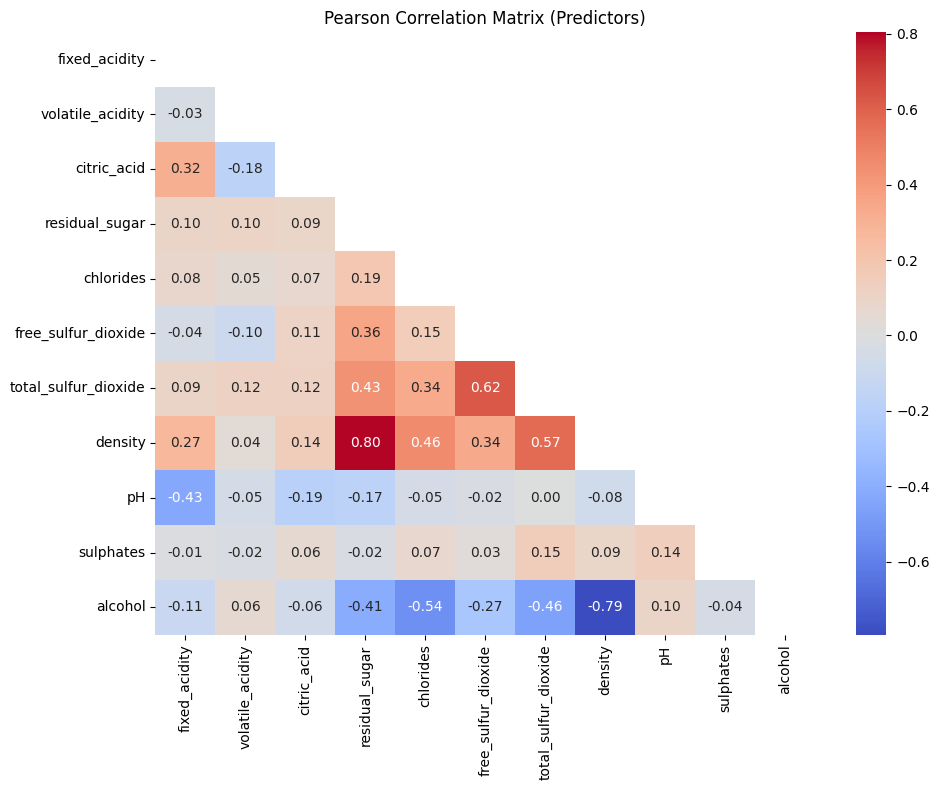

In [114]:
# Create upper triangle mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Pearson Correlation Matrix (Predictors)")
plt.tight_layout()
plt.show()

- density and residual_sugar are higlhy serially correlated.
- a parametric investigation is needed for confirmation

### Variance Inflation Factor (VIF) for testing Multicollinearity

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select predictors only (exclude response)
X = df.drop(columns=["quality"])

# Standardize predictors (recommended before VIF)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_scaled.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_scaled.values, i)
    for i in range(X_scaled.shape[1])
]

# Sort by VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)

                 feature     VIF
7                density 27.0459
3         residual_sugar 10.5483
10               alcohol  8.6093
0          fixed_acidity  2.5971
6   total_sulfur_dioxide  2.4239
8                     pH  2.0328
5    free_sulfur_dioxide  1.9021
4              chlorides  1.5111
2            citric_acid  1.1885
1       volatile_acidity  1.1775
9              sulphates  1.1250


- Clearly, density and residual sugar are highly correlated
- One must be dropped, after further investigations

### Using R-Squared for feature selection between density and residual_sugar


In [116]:
import statsmodels.formula.api as smf

# Model 1: residual sugar only
model_sugar = smf.ols(
    formula="quality ~ residual_sugar",
    data=df
).fit()

print(model_sugar.summary())


# Model 2: density only
model_density = smf.ols(
    formula="quality ~ density",
    data=df
).fit()

print(model_density.summary())

# Print R-squared values
print("R² (residual sugar):", round(model_sugar.rsquared, 4))
print("R² (density):", round(model_density.rsquared, 4))


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     59.88
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           1.27e-14
Time:                        23:43:24   Log-Likelihood:                -4733.7
No. Observations:                3961   AIC:                             9471.
Df Residuals:                    3959   BIC:                             9484.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.9510      0.021    287.

In [117]:
df = df.drop(columns=["residual_sugar"])


In [118]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0000,0.2700,0.3600,0.0450,45.0000,170.0000,0.9986,3.0000,0.4500,8.8000,6.0000
1,6.3000,0.3000,0.3400,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6.0000
2,8.1000,0.2800,0.4000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6.0000
3,7.2000,0.2300,0.3200,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6.0000
6,6.2000,0.3200,0.1600,0.0450,30.0000,136.0000,0.9949,3.1800,0.4700,9.6000,6.0000


In [119]:
# Select predictors only (exclude response)
X = df.drop(columns=["quality"])

# Standardize predictors (recommended before VIF)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_scaled.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_scaled.values, i)
    for i in range(X_scaled.shape[1])
]

# Sort by VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)

                feature    VIF
6               density 3.6376
9               alcohol 3.3574
5  total_sulfur_dioxide 2.3681
4   free_sulfur_dioxide 1.8241
0         fixed_acidity 1.5364
3             chlorides 1.4431
7                    pH 1.3283
2           citric_acid 1.1852
1      volatile_acidity 1.1771
8             sulphates 1.0598


- No Multicolinearity, after dropping residual_sugar




---
# OBJECTIVE 2
- To examine the relationship between key physicochemical properties and wine quality
- This step identifies potential determinants, not causality
## Method
-  Pearson Correlation
---

In [ ]:
# Correlation matrix for predictors only
corr_matrix = df.drop(columns=["quality"]).corr(method="pearson")

corr_matrix

,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.0000,-0.0347,0.3172,0.0784,-0.0417,0.0942,0.2708,-0.4274,-0.0103,-0.1090
volatile_acidity,-0.0347,1.0000,-0.1757,0.0456,-0.1001,0.1153,0.0393,-0.0544,-0.0235,0.0575
citric_acid,0.3172,-0.1757,1.0000,0.0736,0.1080,0.1164,0.1429,-0.1893,0.0570,-0.0649
chlorides,0.0784,0.0456,0.0736,1.0000,0.1530,0.3357,0.4568,-0.0477,0.0688,-0.5368
free_sulfur_dioxide,-0.0417,-0.1001,0.1080,0.1530,1.0000,0.6246,0.3376,-0.0205,0.0292,-0.2680
total_sulfur_dioxide,0.0942,0.1153,0.1164,0.3357,0.6246,1.0000,0.5672,0.0043,0.1475,-0.4584
density,0.2708,0.0393,0.1429,0.4568,0.3376,0.5672,1.0000,-0.0757,0.0911,-0.7940
pH,-0.4274,-0.0544,-0.1893,-0.0477,-0.0205,0.0043,-0.0757,1.0000,0.1395,0.0979
sulphates,-0.0103,-0.0235,0.0570,0.0688,0.0292,0.1475,0.0911,0.1395,1.0000,-0.0437
alcohol,-0.1090,0.0575,-0.0649,-0.5368,-0.2680,-0.4584,-0.7940,0.0979,-0.0437,1.0000


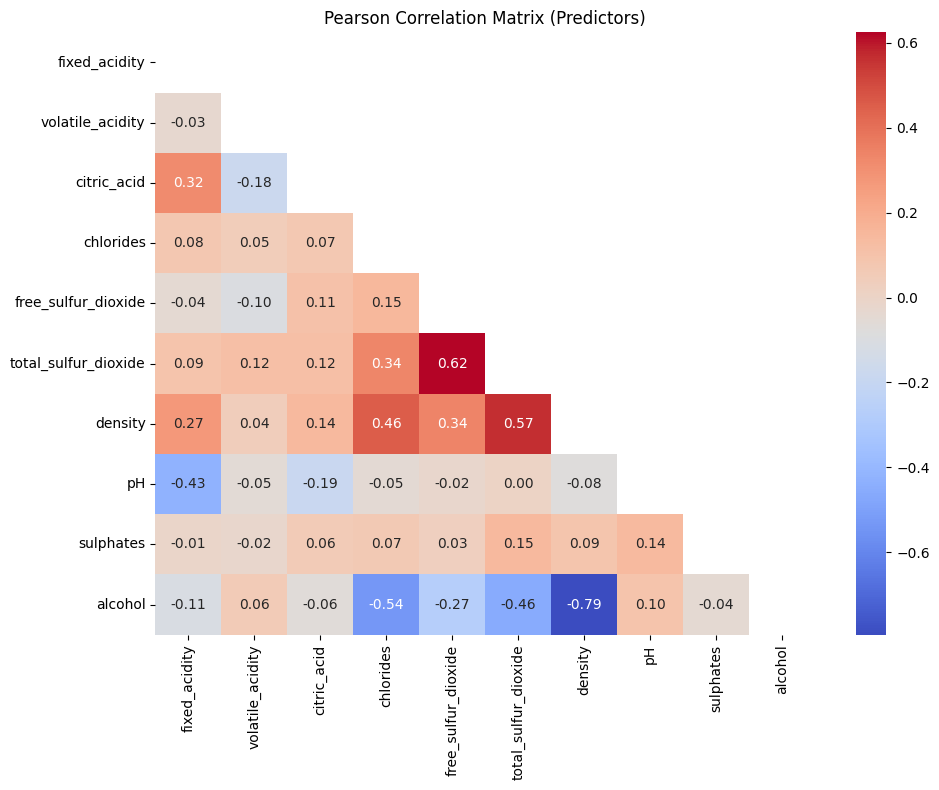

In [ ]:
# Create upper triangle mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Pearson Correlation Matrix (Predictors)")
plt.tight_layout()
plt.show()

## Data Splitting (Train/Validation/Test)

In [ ]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# Splitting into training (64%), validation (16%), and test (20%=Directly from 1st split)
# First split: 80% train+val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Second split: 80% train & 20% val (of the 80% above) (80% of 80% = 64% train; 20% of 80% = 16% val = 0.16)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Show sizes and class distributions
print("\nSplit sizes:")
print(f"Train set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
# Show sizes
{
    "Train set": X_train.shape,
    "Validation set": X_val.shape,
    "Test set": X_test.shape
}


Split sizes:
Train set: 2534 samples (64.0%)
Validation set: 634 samples (16.0%)
Test set: 793 samples (20.0%)


{'Train set': (2534, 10), 'Validation set': (634, 10), 'Test set': (793, 10)}

In [ ]:
X_train_val

,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1594,7.0000,0.2900,0.4900,0.0470,37.0000,136.0000,0.9938,2.9500,0.4000,9.4000
4153,6.1000,0.3000,0.4700,0.0490,50.0000,187.0000,0.9927,3.1900,0.4500,9.5000
1320,7.6000,0.1900,0.4200,0.0440,7.0000,114.0000,0.9914,3.0400,0.7000,12.8000
4739,5.5000,0.1600,0.3100,0.0260,31.0000,68.0000,0.9898,3.3300,0.4400,11.6500
3423,7.1000,0.1800,0.3900,0.0510,48.0000,156.0000,0.9986,3.3500,0.7000,9.1000
...,...,...,...,...,...,...,...,...,...,...
1333,7.8000,0.2100,0.3900,0.0340,62.0000,180.0000,0.9910,3.0900,0.7000,12.6000
1533,7.3000,0.2600,0.4900,0.0280,32.0000,107.0000,0.9936,3.2400,0.5400,10.8000
1022,6.8000,0.1900,0.3200,0.0220,54.0000,188.0000,0.9935,3.2500,0.3700,11.1000
4357,5.9000,0.2800,0.3400,0.0400,50.0000,194.0000,0.9912,3.3100,0.5200,11.6000


# Standardization of features


- Because the features were measured on different scales, standardization becomes imperative. 
- Without scaling, variables like total sulfur dioxide or residual sugar will dominate distance-based or gradient-based algorithms simply because they have larger numeric ranges—not because they are more important.
- We therefore perform StandardScaler (Z-score normalization) 


<span style="font-size: 20px;">$${Z} = \frac{(X-\mu)}{\sigma}$$
- z = scaled value, x = original value, μ = mean of the feature, σ = standard deviation of the feature

In [ ]:

# Initialize scaler and fit on training data
scaler = StandardScaler() #Creates StandardScaler object. At this point, it hasn't learned any statistics yet

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),#Fit: Calculates mean & SD for each feature in X_train
    columns=X_train.columns,#Transform: Applies the scaling using those calculated statistics
    index=X_train.index)#Critical: Only learns statistics from training data (prevents data leakage)

# Scale validation and test sets using training statistics
X_val_scaled = pd.DataFrame(
    scaler.transform(X_val),
    columns=X_val.columns,
    index=X_val.index)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),#transform() uses the same mean and SD calculated from training data
    columns=X_test.columns,#Applies scaling to test data using training statistics
    index=X_test.index)#Key point: No fit() - prevents data leakage

---
# OBJECTIVE 3

- To identify the most significant physicochemical determinants that impact wine quality

## Method
### Side-by-side coefficient comparison of:
- Linear regression
- Rigdge Regression (L2)
- LASSO Regression (L1)
- Elastic Net (L1 + L2)
- Huber Regression
---

## Multiple Regression (Baseline Model)

In [ ]:


# Create a copy of the scaled features and add the target variable
scaled_df = X_train_scaled.copy()
scaled_df['quality'] = y_train

# Create formula string automatically
formula = "quality ~ " + " + ".join(X_train_scaled.columns)

# Run OLS
import statsmodels.formula.api as smf
ols_model = smf.ols(formula=formula, data=scaled_df).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sun, 11 Jan 2026   Prob (F-statistic):          5.53e-191
Time:                        23:38:57   Log-Likelihood:                -2565.4
No. Observations:                2534   AIC:                             5153.
Df Residuals:                    2523   BIC:                             5217.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8208 

In [ ]:
X = scaled_df.drop(columns=["quality"])
y = scaled_df["quality"]

## Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

ridge_coef = pd.Series(
    ridge.coef_,
    index=X.columns,
    name="Ridge"
)

print(ridge_coef.sort_values(ascending=False))


alcohol                 0.3896
free_sulfur_dioxide     0.1560
sulphates               0.0501
pH                      0.0440
density                 0.0428
citric_acid             0.0345
fixed_acidity          -0.0370
total_sulfur_dioxide   -0.0572
chlorides              -0.0615
volatile_acidity       -0.1480
Name: Ridge, dtype: float64


### LASSO

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.05)
lasso.fit(X, y)

lasso_coef = pd.Series(
    lasso.coef_,
    index=X.columns,
    name="LASSO"
)

print(lasso_coef.sort_values(ascending=False))


alcohol                 0.3260
free_sulfur_dioxide     0.0714
pH                      0.0148
sulphates               0.0013
citric_acid             0.0000
fixed_acidity          -0.0000
density                -0.0000
total_sulfur_dioxide   -0.0000
chlorides              -0.0326
volatile_acidity       -0.1142
Name: LASSO, dtype: float64


## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.05, l1_ratio=0.5)
elastic.fit(X, y)

elastic_coef = pd.Series(
    elastic.coef_,
    index=X.columns,
    name="ElasticNet"
)

print(elastic_coef.sort_values(ascending=False))


alcohol                 0.3379
free_sulfur_dioxide     0.0980
pH                      0.0299
sulphates               0.0237
citric_acid             0.0052
total_sulfur_dioxide   -0.0000
density                -0.0000
fixed_acidity          -0.0105
chlorides              -0.0535
volatile_acidity       -0.1320
Name: ElasticNet, dtype: float64


## HuberRegressor

In [ ]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor()
huber.fit(X, y)

huber_coef = pd.Series(
    huber.coef_,
    index=X.columns,
    name="Huber"
)

print(huber_coef.sort_values(ascending=False))


alcohol                 0.4168
free_sulfur_dioxide     0.1545
density                 0.0512
pH                      0.0511
sulphates               0.0489
citric_acid             0.0340
fixed_acidity          -0.0295
chlorides              -0.0647
total_sulfur_dioxide   -0.0783
volatile_acidity       -0.1356
Name: Huber, dtype: float64


## Side-by-side Coefficient Comparison

In [ ]:
coef_comparison = pd.concat(
    [
        ols_model.params.drop("Intercept"),
        ridge_coef,
        lasso_coef,
        elastic_coef,
        huber_coef
    ],
    axis=1
)

print(coef_comparison)
# coef_comparison


                           0   Ridge   LASSO  ElasticNet   Huber
fixed_acidity        -0.0371 -0.0370 -0.0000     -0.0105 -0.0295
volatile_acidity     -0.1481 -0.1480 -0.1142     -0.1320 -0.1356
citric_acid           0.0345  0.0345  0.0000      0.0052  0.0340
chlorides            -0.0615 -0.0615 -0.0326     -0.0535 -0.0647
free_sulfur_dioxide   0.1561  0.1560  0.0714      0.0980  0.1545
total_sulfur_dioxide -0.0573 -0.0572 -0.0000     -0.0000 -0.0783
density               0.0433  0.0428 -0.0000     -0.0000  0.0512
pH                    0.0439  0.0440  0.0148      0.0299  0.0511
sulphates             0.0501  0.0501  0.0013      0.0237  0.0489
alcohol               0.3901  0.3896  0.3260      0.3379  0.4168


- Clearly, alchol emerges as the most relevant feature, across all selected models.

- Using standardized predictors, alcohol content consistently exhibits the largest effect size, the strongest statistical significance in OLS estimation, and the highest robustness across Ridge, LASSO, Elastic Net, and Huber regressions. 
- These results identify alcohol as the most important physicochemical determinant of wine quality in the sample.

---
# OBJECTIVE 4

- To develop and evaluate predictive models that use physicochemical attributes to predict white wine quality

## Method
### Comparison of Statistical and Machine Learning Techniques
- Multiple linear regression
- Rigdge Regression (L2)
- LASSO Regression (L1)
- Elastic Net (L1 + L2)
- Huber Regression
- Random Forest Regression
- Support Vector Regression
- Gradient Boosting Machines
- Model Evaluation Metrics
### Using Performance Metrics
- R²
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- Max Error
- Mean Absolute Percentage Error (MAPE)

---
- Employing multiple models enables comparison between parametric and non-parametric approaches, capturing both linear and nonlinear relationships. 
- Cross-validation is used to ensure model generalizability and mitigate overfitting. 
- Performance metrics are selected to balance explanatory power and prediction accuracy.


In [ ]:

import shap

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    max_error,
    mean_absolute_percentage_error,
    r2_score,
)

# =============================
# Prepare data
# =============================
X = df.drop(columns=["quality"])
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================
# Models
# =============================
models = {
    "OLS": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Huber": HuberRegressor(),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
    "DecisionTree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "NeuralNet": MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# =============================
# Train & Evaluate
# =============================
results = {}
coefficients = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Adjusted R²
    n = len(y_test)
    p = X_test_scaled.shape[1]
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    results[name] = {
        "R²": r2,
        "Adjusted R²": adj_r2,
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred)
    }
    
    # Extract coefficients/importances based on model type
    if hasattr(model, "coef_"):
        # Linear models (OLS, Ridge, Lasso, ElasticNet, Huber)
        coefficients[name] = model.coef_
    elif hasattr(model, "feature_importances_"):
        # Tree-based models (DecisionTree, RandomForest, XGBoost, LightGBM)
        coefficients[name] = model.feature_importances_
    elif name == "NeuralNet":
        # Neural Network: Use weights from the first layer (simplified)
        coefficients[name] = model.coefs_[0].mean(axis=1)  # Average across neurons
    else:
        # SVR (non-linear kernel) or others: Use SHAP values as proxy
        coefficients[name] = np.nan  # Placeholder (SHAP handled later)

# =============================
# Results DataFrames
# =============================
results_df = pd.DataFrame(results).T.sort_values(by="R²", ascending=False)
coefficients_df = pd.DataFrame(coefficients, index=X.columns)

# =============================
# Display
# =============================
pd.set_option('display.float_format', lambda x: '%.4f' % x)

print("="*80)
print("MODEL EVALUATION METRICS (Sorted by R² Score)")
print("="*80)
print(results_df)

best_model_name = results_df.index[0]
print(f"\nBest performing model: {best_model_name} (R² = {results_df.loc[best_model_name, 'R²']:.4f})")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 3168, number of used features: 10
[LightGBM] [Info] Start training from score 5.821023


c:\Users\vkpoa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


MODEL EVALUATION METRICS (Sorted by R² Score)
                  R²  Adjusted R²   RMSE    MAE  Max Error   MAPE
RandomForest  0.3547       0.3464 0.6555 0.5273     2.2600 0.0938
LightGBM      0.3299       0.3213 0.6680 0.5353     2.3743 0.0950
NeuralNet     0.2748       0.2655 0.6949 0.5587     2.5192 0.0993
DecisionTree  0.2645       0.2551 0.6998 0.5600     2.5261 0.1000
Huber         0.2643       0.2549 0.6999 0.5585     2.4748 0.0998
Ridge         0.2623       0.2529 0.7009 0.5611     2.3420 0.1001
OLS           0.2623       0.2528 0.7009 0.5611     2.3427 0.1001
XGBoost       0.2556       0.2460 0.7041 0.5603     2.3883 0.0994
ElasticNet    0.2468       0.2372 0.7082 0.5740     2.2841 0.1027
Lasso         0.2183       0.2083 0.7215 0.5871     2.3150 0.1053
SVR          -0.1238      -0.1382 0.8650 0.6680     4.1121 0.1186

Best performing model: RandomForest (R² = 0.3547)


### Visualization of Performance Metrics

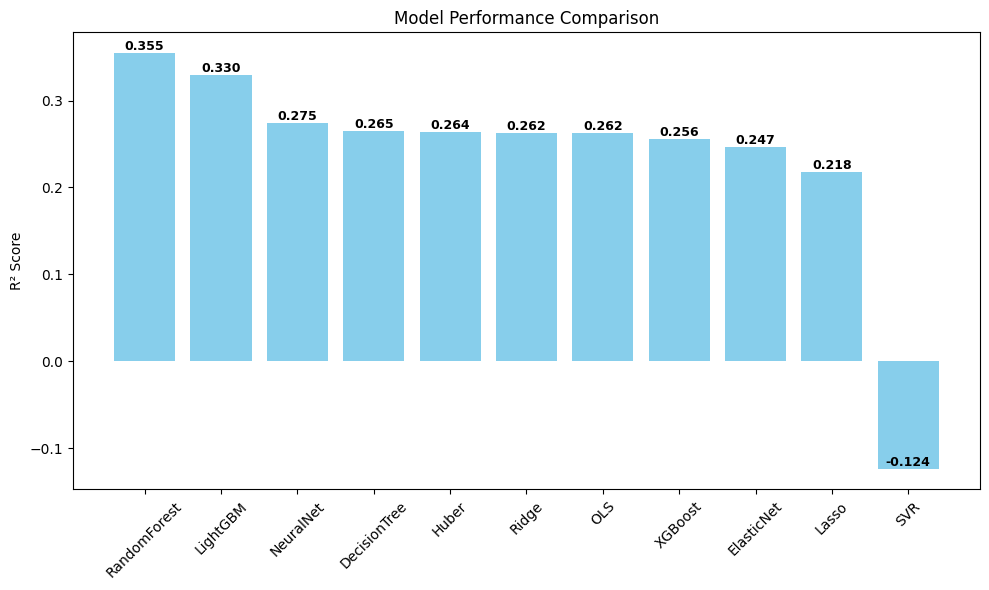

In [ ]:

# =============================
# Visualization of Performance Metrics. Chose the best model
# =============================
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df.index, results_df["R²"], color='skyblue')
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)

# Add R² values on top of each bar
for bar, r2 in zip(bars, results_df["R²"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{r2:.3f}", 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

---
# Objective 5

To analyze the extent to which individual features contribute to variations in best performing quality score model

## Method

Feature importance using SHAP

---







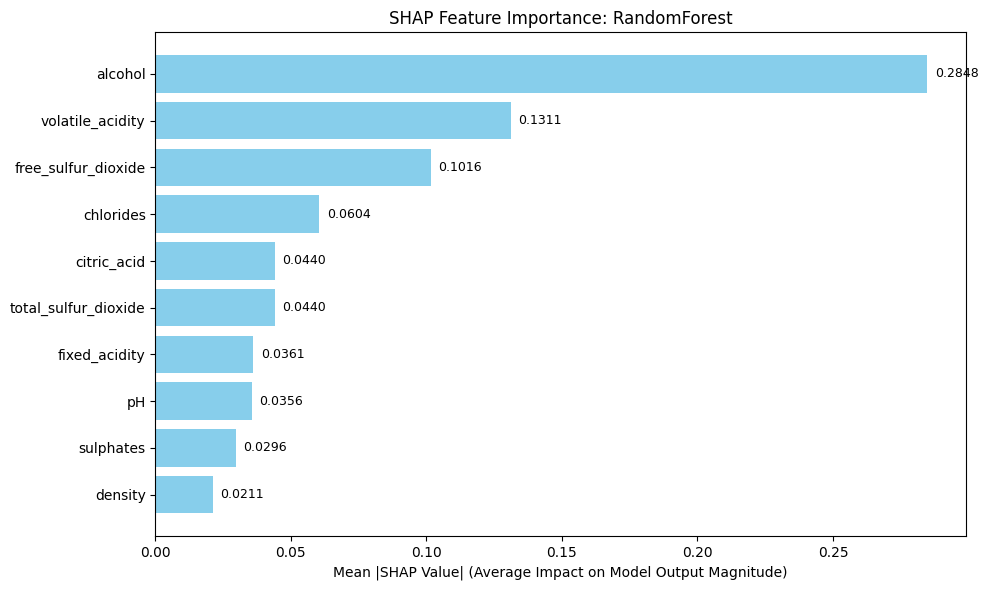

In [ ]:

# =============================
# SHAP Feature Importance for Best Model (with values on bars)
# ==========================================================
best_model = models[best_model_name]

# Compute SHAP values
if best_model_name in ["RandomForest", "XGBoost", "LightGBM", "DecisionTree"]:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test_scaled)
else:
    explainer = shap.KernelExplainer(best_model.predict, X_train_scaled[:50])
    shap_values = explainer.shap_values(X_test_scaled[:50])

# Get mean absolute SHAP values for each feature
if isinstance(shap_values, list):
    shap_values = np.abs(shap_values).mean(0)  # Handle multi-class
mean_shap_values = np.abs(shap_values).mean(axis=0)

# Create a DataFrame for SHAP importances
shap_importance = pd.DataFrame({
    "Feature": X.columns,
    "SHAP_Value": mean_shap_values
}).sort_values("SHAP_Value", ascending=False)

# Plot with annotations
plt.figure(figsize=(10, 6))
bars = plt.barh(shap_importance["Feature"], shap_importance["SHAP_Value"], color='skyblue')
plt.xlabel("Mean |SHAP Value| (Average Impact on Model Output Magnitude)")
plt.title(f"SHAP Feature Importance: {best_model_name}")

# Add SHAP values on bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.01 * max(shap_importance["SHAP_Value"]),  # Offset slightly
        bar.get_y() + bar.get_height() / 2,
        f"{width:.4f}",
        va="center",
        ha="left",
        fontsize=9
    )

plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()



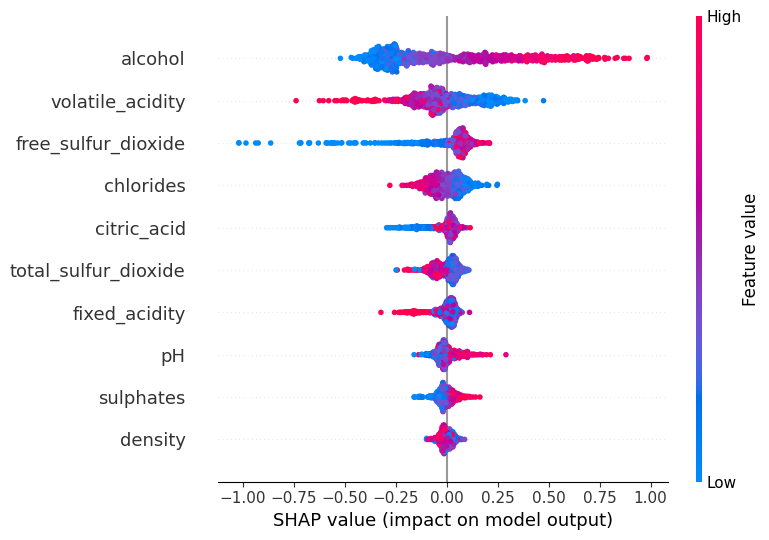

In [ ]:
# Original SHAP summary plot (beeswarm or bar)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)  # Beeswarm plot
# shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")  # Bar plot (no values)M